In [243]:
import rocketpy
from rocketpy import Environment, Rocket, Flight, SolidMotor 
import pandas as pd
import numpy as np
from scipy.interpolate import interp1d
import datetime 

# Environment

In [244]:
env = Environment(
    latitude = -21.90795,
    longitude = -48.96156,
    elevation = 495,
)

date = datetime.date.today() + datetime.timedelta(days=1)

env.set_date(
    (date.year, date.month, date.day, 12), 
    timezone="America/Sao_Paulo"
)


env.set_atmospheric_model(
    type="custom_atmosphere",
    wind_u=[
        (0, 2.778), 
        (2000, 2.778) 
    ],
    wind_v=[
        (0, 0), 
        (2000, 0), 
    ],
)
env.max_expected_height = 2000



Gravity Details

Acceleration of gravity at surface level:    9.7860 m/s²
Acceleration of gravity at   2.000 km (ASL): 9.7813 m/s²


Launch Site Details

Launch Date: 2025-09-15 15:00:00 UTC | 2025-09-15 12:00:00 America/Sao_Paulo
Launch Site Latitude: -21.90795°
Launch Site Longitude: -48.96156°
Reference Datum: SIRGAS2000
Launch Site UTM coordinates: 90584.06 W    7572074.74 S
Launch Site UTM zone: 23K
Launch Site Surface Elevation: 495.0 m


Atmospheric Model Details

Atmospheric Model Type: custom_atmosphere
custom_atmosphere Maximum Height: 2.000 km

Surface Atmospheric Conditions

Surface Wind Speed: 2.78 m/s
Surface Wind Direction: 270.00°
Surface Wind Heading: 90.00°
Surface Pressure: 955.47 hPa
Surface Temperature: 284.94 K
Surface Air Density: 1.168 kg/m³
Surface Speed of Sound: 338.26 m/s


Earth Model Details

Earth Radius at Launch site: 6375.18 km
Semi-major Axis: 6378.14 km
Semi-minor Axis: 6356.75 km
Flattening: 0.0034


Atmospheric Model Plots



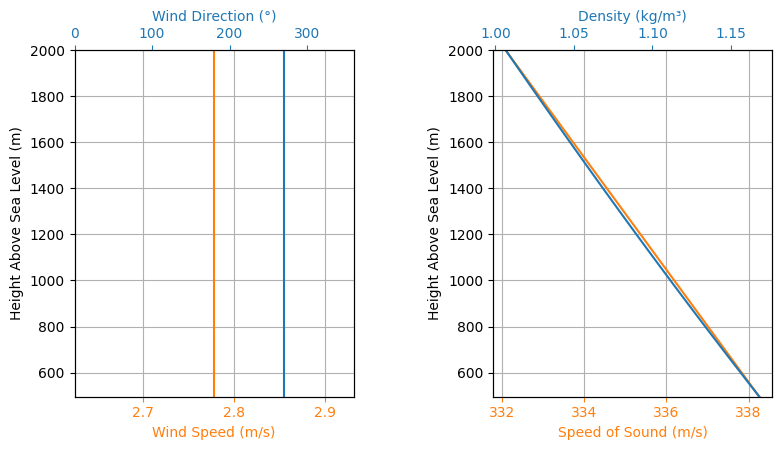

In [245]:
env.info()

# Solid Motor

In [246]:
Rocket_motor_1km = SolidMotor(
    thrust_source="thrust_time.csv",
    dry_mass = 2.30,
    dry_inertia = (0.0172, 0.0172, 0.0027),
    nozzle_radius= 14.7/1000,
    grain_number= 2,
    grain_density = 1700,
    grain_outer_radius = 36 / 1000,
    grain_initial_inner_radius = 7.5 / 1000,
    grain_initial_height = 110 / 1000,
    grain_separation = 1 / 1000,
    grains_center_of_mass_position = 150.5 / 1000,
    center_of_dry_mass_position = 120.7 / 1000,
    nozzle_position= 0,
    burn_time= 3.5,
    throat_radius= 5.5/1000,
    coordinate_system_orientation="nozzle_to_combustion_chamber",
)

Nozzle Details
Nozzle Radius: 0.0147 m
Nozzle Throat Radius: 0.0055 m

Grain Details
Number of Grains: 2
Grain Spacing: 0.001 m
Grain Density: 1700 kg/m3
Grain Outer Radius: 0.036 m
Grain Inner Radius: 0.0075 m
Grain Height: 0.11 m
Grain Volume: 0.000 m3
Grain Mass: 0.728 kg

Motor Details
Total Burning Time: 3.5 s
Total Propellant Mass: 1.457 kg
Structural Mass Ratio: 0.612
Average Propellant Exhaust Velocity: 1003.380 m/s
Average Thrust: 417.593 N
Maximum Thrust: 455.32161 N at 2.4 s after ignition.
Total Impulse: 1461.574 Ns



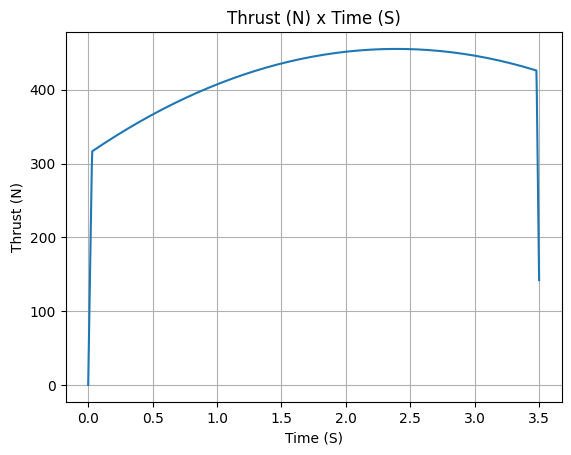

In [247]:
Rocket_motor_1km.info()

# Rocket

In [248]:
df = pd.read_csv("cd_mach.DAT")

cd_off_func = interp1d(df["mach"], df["cd_off"], fill_value="extrapolate")
cd_on_func  = interp1d(df["mach"], df["cd_on"],  fill_value="extrapolate")

In [249]:
Rocket_1km = Rocket(
    radius= 37.50/1000,
    mass= 5.2,
    inertia=(0.534, 0.534, 0.031), 
    power_off_drag= cd_off_func,
    power_on_drag= cd_on_func,
    center_of_mass_without_motor= 1.2, 
    coordinate_system_orientation="tail_to_nose",
)

Rocket_1km.add_motor(Rocket_motor_1km, position = -26 / 1000)

## AED

In [250]:
nose_cone = Rocket_1km.add_nose(
    length= 210.647/1000, kind="elliptical", position= 1536.189 /1000,
)

fin_set = Rocket_1km.add_trapezoidal_fins(
    n=4,
    root_chord = 125.172 / 1000,
    tip_chord = 60.172 / 1000,
    span= 65.000 / 1000,
    position= 125.172 / 1000,
    cant_angle = 0,
)

Identification of the AeroSurface:
----------------------------------
Name: Fins
Python Class: <class 'rocketpy.rocket.aero_surface.fins.trapezoidal_fins.TrapezoidalFins'>

Geometric information of the fin set:
-------------------------------------
Number of fins: 4
Reference rocket radius: 0.037 m
Tip chord: 0.060 m
Root chord: 0.125 m
Span: 0.065 m
Cant angle: 0.000 ° or 0.000 rad
Longitudinal section area: 0.006 m²
Aspect ratio: 1.403 
Gamma_c: 0.464 m
Mean aerodynamic chord: 0.029 m

Roll information of the fin set:
--------------------------------
Geometric constant: 0.000 m
Damping interference factor: 1.231 rad
Forcing interference factor: 0.935 rad

Lift information of the fin set:
--------------------------------
Lift interference factor: 1.366 m
Center of Pressure position in local coordinates: (0.000, 0.000, 0.053)
Lift Coefficient derivative (single fin) at Mach 0 and AoA 0: 2.646
Lift Coefficient derivative (fin set) at Mach 0 and AoA 0: 7.228


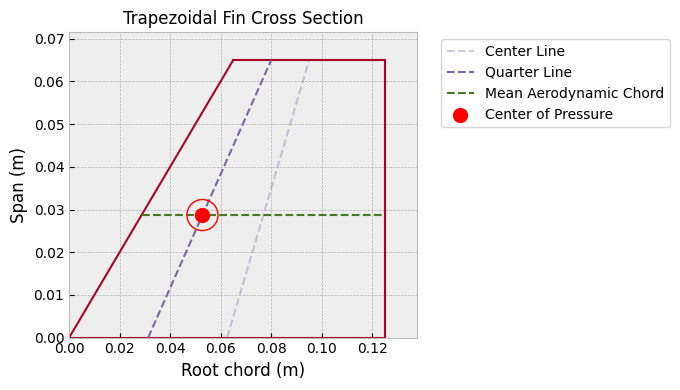

Roll parameters:


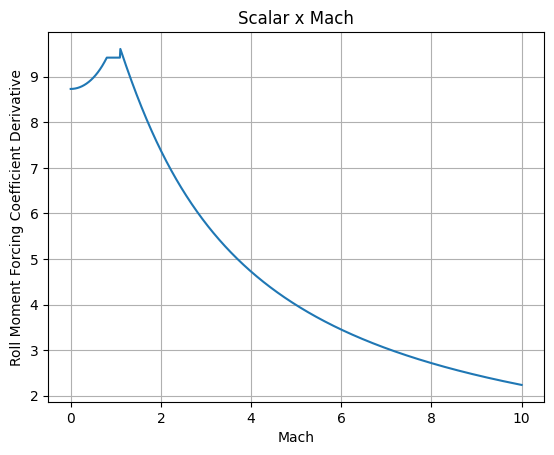

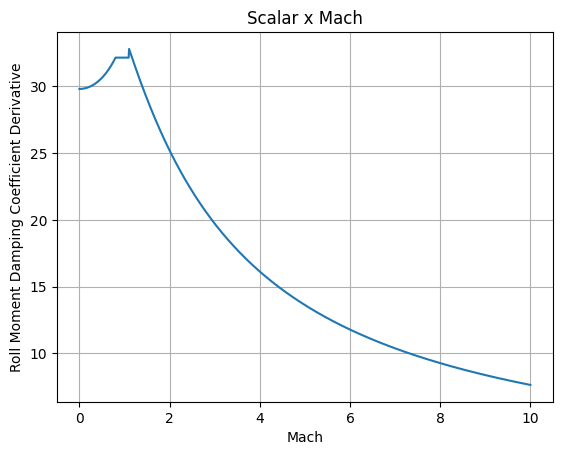

Lift coefficient:


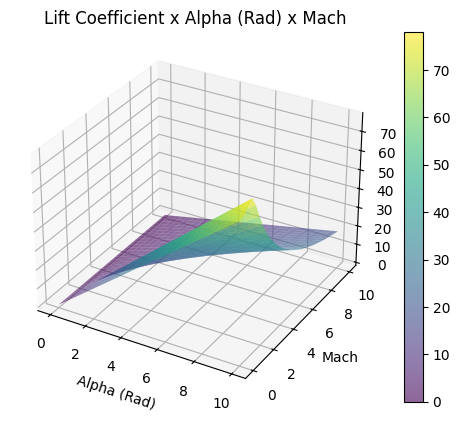

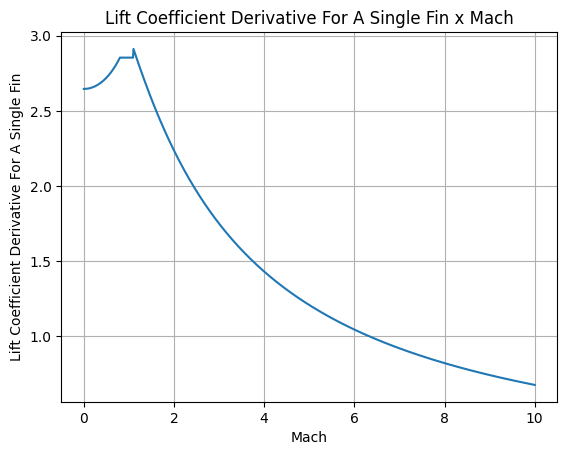

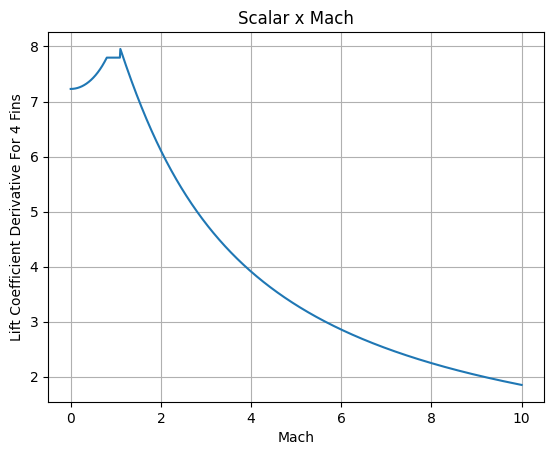

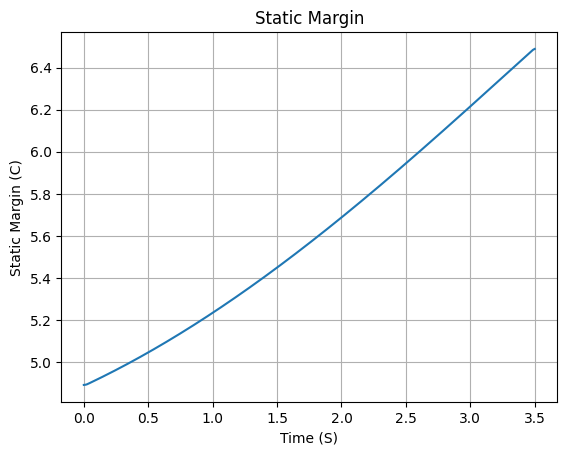

In [251]:
fin_set.all_info()
Rocket_1km.plots.static_margin()

## REC

In [252]:
def usar_paraquedas():
    Rocket_1km.add_parachute(
        name="main",
        cd_s=1.5*np.pi,
        trigger="apogee",
        sampling_rate=100
        )

# Esquema Do Foguete

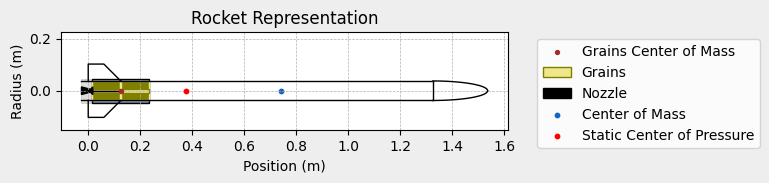

In [253]:
Rocket_1km.draw()

# Flight

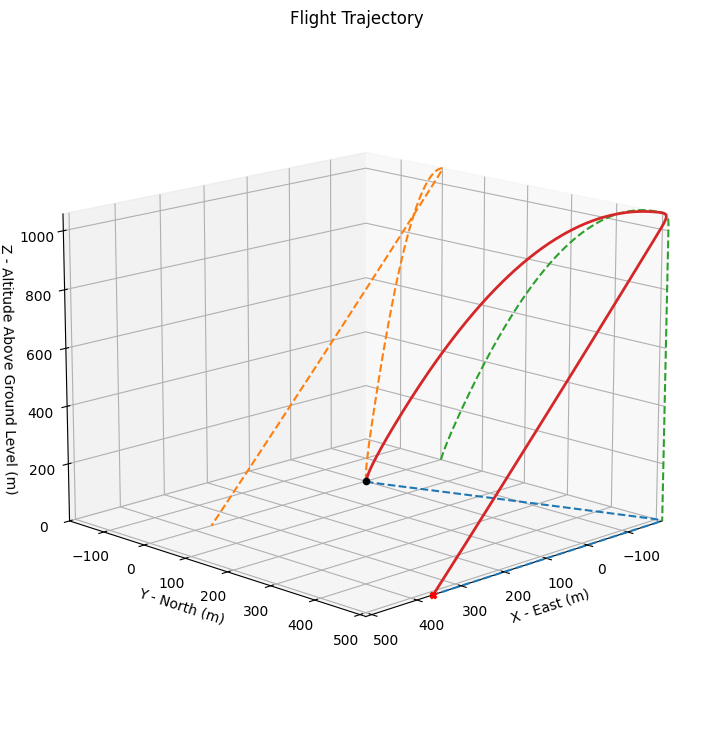


Apogee State

Apogee Time: 16.306 s
Apogee Altitude: 1551.665 m (ASL) | 1056.665 m (AGL)
Apogee Freestream Speed: 35.527 m/s
Apogee X position: -183.841 m
Apogee Y position: 489.219 m
Apogee latitude: -21.9035532°
Apogee longitude: -48.9633408°


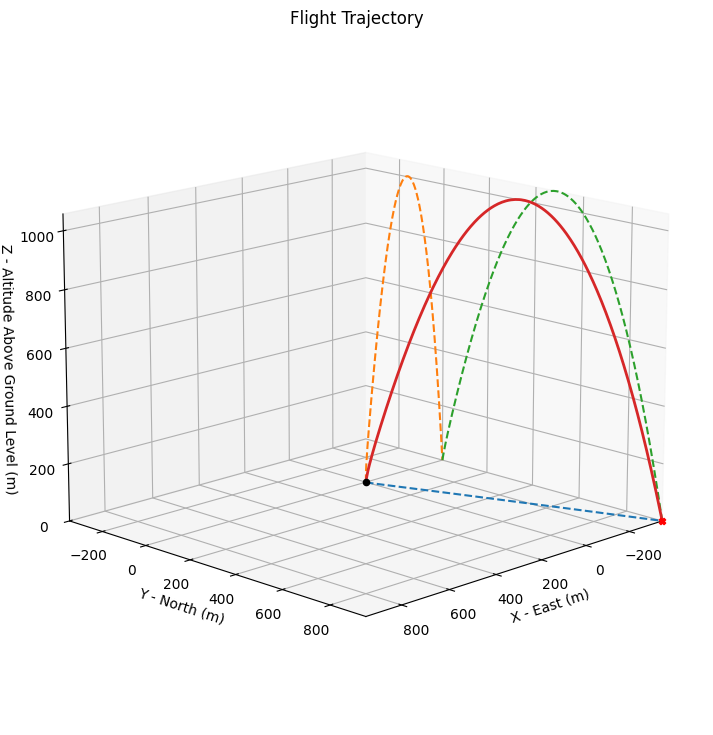

In [254]:
test_flight_balistic = Flight(
    rocket=Rocket_1km, environment=env, rail_length=4, inclination=80, heading=0
    )

usar_paraquedas()

test_flight = Flight(
    rocket=Rocket_1km, environment=env, rail_length=4, inclination=80, heading=0
    )

test_flight.plots.trajectory_3d()
test_flight.prints.apogee_conditions()
test_flight_balistic.plots.trajectory_3d()

### Export data

In [ ]:
test_flight.export_data(
    "Rocket_1km.csv",
    "angle_of_attack",
    "mach_number",
    time_step=1.0,
)

test_flight_balistic.export_data(
    "Rocket_1km.csv",
    "angle_of_attack",
    "mach_number",
    time_step=1.0,
)

test_flight.plots.trajectory_3d(filename="trajectory_plot_1km.jpg")
test_flight_balistic.plots.trajectory_3d(filename="trajectory_plot_1km_balistic.jpg")